# Package Import and Setting Up

In [1]:
!sudo apt-get install graphviz graphviz-dev
!pip install pyvis pygraphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'libgraphviz-dev' instead of 'graphviz-dev'
graphviz is already the newest version (2.42.2-6).
libgraphviz-dev is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [2]:
# from google.colab import output
# output.serve_kernel_port_as_window(8081)

In [3]:
# Import necessary libraries and modules
from google.colab import userdata # For Secret keeping in google colab

import datetime
import requests
import json
import time
import re
from pprint import pprint
from bs4 import BeautifulSoup


# Data manipulation and analysis libraries
import pandas as pd   # For data manipulation and analysis
import numpy as np    # For numerical computing

# Data visualization libraries
import matplotlib.pyplot as plt     # For creating visualizations
import seaborn as sns               # For advanced statistical data visualizations
import networkx as nx
from pyvis import network
import matplotlib.ticker as ticker  # For customizing tick locations and formats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from wordcloud import WordCloud     # For generating word cloud images from text data


%matplotlib inline

# Data Extractor

In [4]:
connecting_dictionary={}
word_set=set()
connection_set={}

In [5]:
def wiki_maker(base_site,search_word,page_limit,word_limit=3):

  init_mode=True
  search_word=search_word.lower()

  for i in range(page_limit):

    next_word=None
    next_word_list=[]

    # print(f"{base_site}/{search_word}")

    #Calling api
    resp=requests.get(f"{base_site}/{search_word}")
    body = resp.json()

    #Storing words
    for index, i in enumerate(body['pages']):
      if(index==word_limit):break
      title = i['title']
      next_word_list.append(title.lower())


    #Making words into lower case
    # next_word_list=list(map(lambda x:x.lower(),next_word_list))
    # print(next_word_list)

    #Storing in dictionary
    if(search_word not in connecting_dictionary):
      connecting_dictionary[search_word]=next_word_list
      # print(connecting_dictionary)

    #Selecting next_word
    if(init_mode==True):

      for word in next_word_list:

        c_set=tuple([
            (search_word if search_word else "none"),
             (word if word else "none")
             ])
        connection_set[c_set]=True

        if(word not in word_set and next_word==None):
          word_set.add(word)
          next_word=word

      print(f"{search_word} --> {next_word} out of {next_word_list}")

      init_mode=False
    else:

      for word in next_word_list:

        if(word not in word_set and next_word==None):
          word_set.add(word)
          next_word=word

        c_set=tuple([
            (search_word if search_word else "none"),
             (word if word else "none")
             ])
        connection_set[c_set]=True

      print(f"{search_word} --> {next_word} out of {next_word_list}")

    search_word=next_word

    if(next_word==None):
      break

In [6]:
word_list=[
    "Apple","Bee","Cat","Dog","Elephant","Fish","Goat","Heart","Igloo","Jacket","Kite","Lion","Mouse","Nest","Octopus","Penguin","Queen",
    "Rabbit","Sun","Turtle","Umbrella","Violin","Water","Xylophone","Yarn","Zygote","Wikipedia","Electron","Marriage","Python","Reptile",
    "GitHub","api","keyboard","home","house","romeo","Gorilla","Kong","Godzilla","research","reddit","drag","dump","hello","word","hola",
    "ram","rom","disk","Cisco","Flash","search","podcast","program","competition","coding","open","closed","project","page","India","ok"
]

In [7]:
# word_list=["Apple"]

In [8]:
len(word_list)

63

In [9]:
%%time
for search_word in word_list:
  print("+"*100)
  print(f"Searching for : {search_word}")
  print("+"*100)

  page_limit,word_limiter=50,6
  base_site="https://en.wikipedia.org/api/rest_v1/page/related"

  word_set.add(search_word.lower())
  try:
    wiki_maker(base_site,search_word,page_limit,word_limiter)
  except KeyError as ke:
    pass


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Searching for : Apple
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
apple --> pear out of ['pear', 'peach', 'citrus', 'mango', 'apricot', 'fruit_tree_propagation']
pear --> kumquat out of ['kumquat', 'peach', 'cherry', 'persimmon', 'malus', 'quince']
kumquat --> citrus out of ['citrus', 'calamansi', 'mandarin_orange', 'tangerine', 'citrus_unshiu', 'trifoliate_orange']
citrus --> grapefruit out of ['grapefruit', 'mandarin_orange', 'citrus_cavaleriei', 'lime_(fruit)', 'citron', 'bitter_orange']
grapefruit --> clementine out of ['citrus', 'clementine', 'mandarin_orange', 'tangerine', 'jamaican_tangelo', 'bitter_orange']
clementine --> mandarin_orange out of ['citrus', 'grapefruit', 'mandarin_orange', 'tangerine', 'tangelo', 'pomelo']
mandarin_orange --> tangerine out of ['kumquat', 'citrus', 'clementine', 'tangerine', 'tangelo', 'pomel

In [10]:
# print(json.dumps(connecting_dictionary,indent=2))
# print("+"*100)
# pprint(word_set)
# print("+"*100)
# pprint(connection_set,indent=4)
# print("+"*100)

# Graph Creation

## Directed Graph Config

In [11]:
# Connection/Edge mode
# Create an example dictionary with key-value pairs
graph_data = connection_set

# Create an empty graph
G = nx.DiGraph()

# Add nodes and edges from the dictionary
for nodes, bools in graph_data.items():
    G.add_node(nodes[0])
    G.add_node(nodes[1])
    G.add_edge(nodes[0],nodes[1])

#------------------------------------------------------------------------

# # # Node/Vertices Mode
# # Create an example dictionary with key-value pairs
# graph_data = connecting_dictionary

# # Create an empty graph
# G = nx.DiGraph()

# # Add nodes and edges from the dictionary
# for nodes in graph_data:
#     G.add_node(nodes)
#     G.add_node(graph_data[nodes])
#     G.add_edge(nodes,graph_data[nodes])

## Undirected Graph Config

In [12]:
# Connection/Edge mode
# Create an example dictionary with key-value pairs
graph_data = connection_set

# Create an empty graph
G_undirected = nx.Graph()

# Add nodes and edges from the dictionary
for nodes, bools in graph_data.items():
    G_undirected.add_edge(nodes[0],nodes[1])

#-----------------------------------------------------------------------------------------------------------------------------

# # # Node/Vertices Mode
# # Create an example dictionary with key-value pairs
# graph_data = connecting_dictionary

# # Create an empty graph
# G_undirected = nx.Graph()

# # Add nodes and edges from the dictionary
# for nodes in graph_data:
#     G_undirected.add_edge(nodes,graph_data[nodes])

## Coloring (Directed)

In [13]:
for graph_node in G.nodes:
  if(graph_node in connecting_dictionary):
    print(f"Setting color for {graph_node} ... ")
    G.nodes[graph_node]['color']='red'
  else:
    G.nodes[graph_node]['color']='skyblue' #'#00b4d9'

node_color_mapping=[G.nodes[node]['color'] for node in G.nodes]
print(node_color_mapping)

Setting color for apple ... 
Setting color for pear ... 
Setting color for citrus ... 
Setting color for mango ... 
Setting color for kumquat ... 
Setting color for calamansi ... 
Setting color for mandarin_orange ... 
Setting color for tangerine ... 
Setting color for trifoliate_orange ... 
Setting color for grapefruit ... 
Setting color for lime_(fruit) ... 
Setting color for bitter_orange ... 
Setting color for clementine ... 
Setting color for marmalade ... 
Setting color for orange_juice ... 
Setting color for pectin ... 
Setting color for citric_acid ... 
Setting color for acid ... 
Setting color for adenosine_triphosphate ... 
Setting color for citric_acid_cycle ... 
Setting color for acid–base_reaction ... 
Setting color for acid_dissociation_constant ... 
Setting color for base_(chemistry) ... 
Setting color for chemical_reaction ... 
Setting color for chemistry ... 
Setting color for chemical_bond ... 
Setting color for covalent_bond ... 
Setting color for electronegativity .

## Graphs (Directed Mode)

### Normal Graph

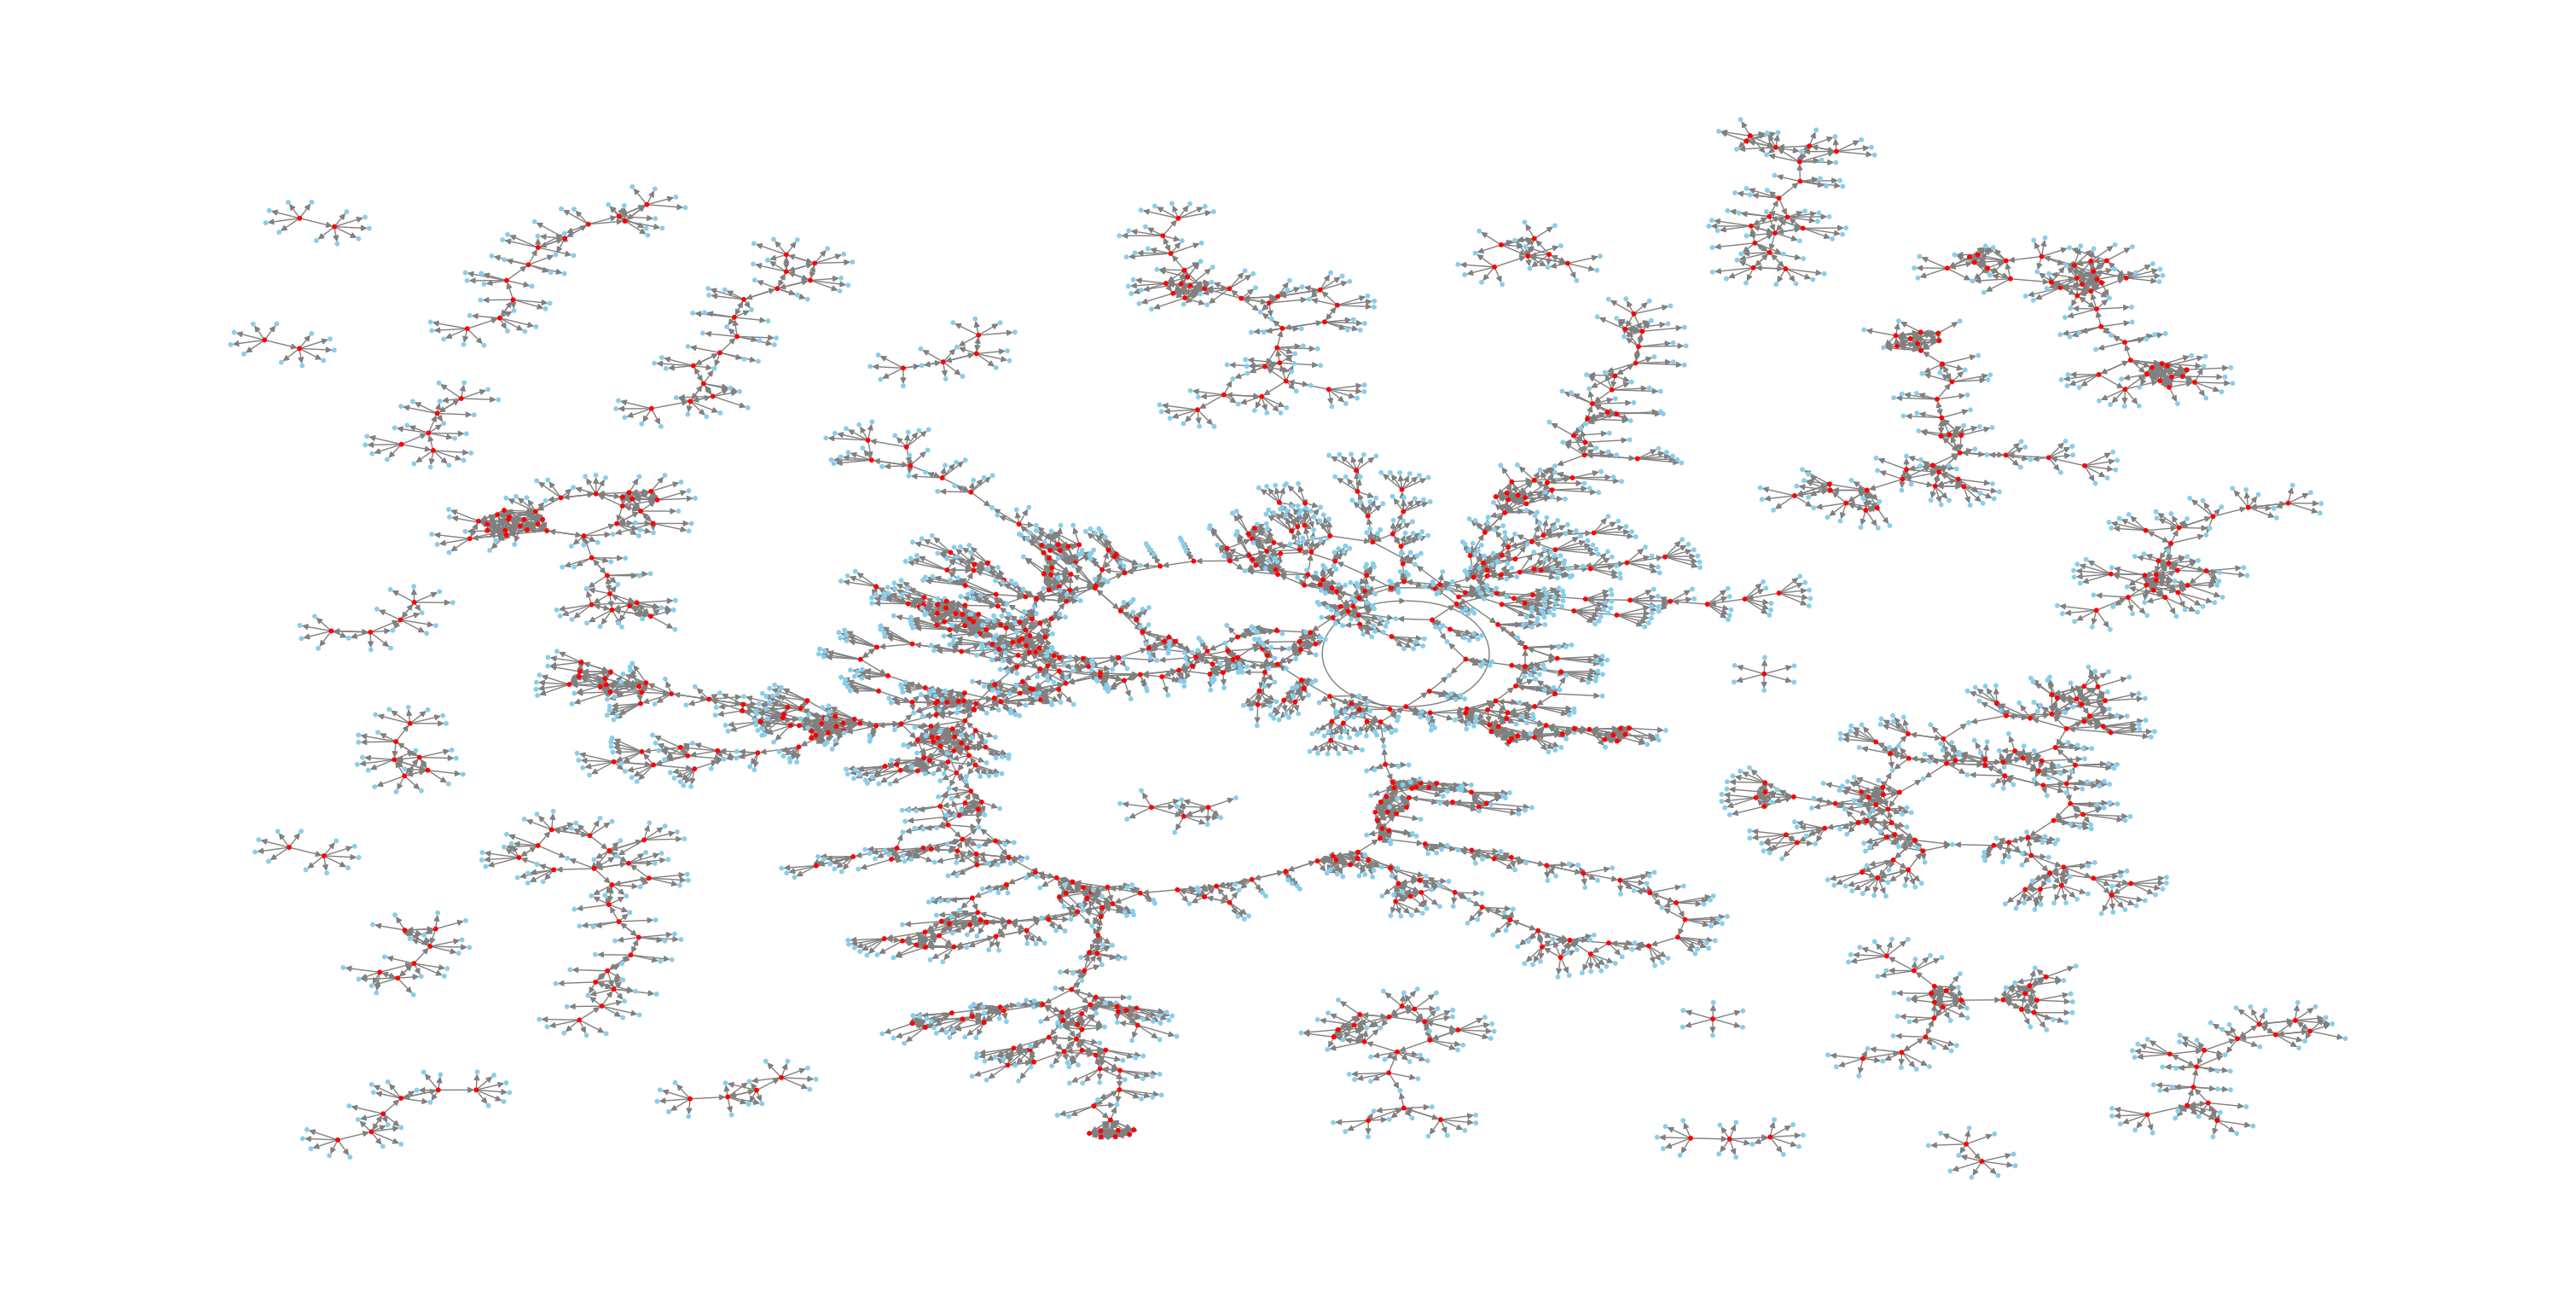

In [14]:
plt.figure(figsize=(30,15))
pos_normal = nx.nx_agraph.graphviz_layout(G, prog="neato")  # you can choose other layout algorithms
nx.draw(G,node_color=node_color_mapping,pos=pos_normal,with_labels=False,node_size=10, font_size=8, edge_color='gray')
plt.show()

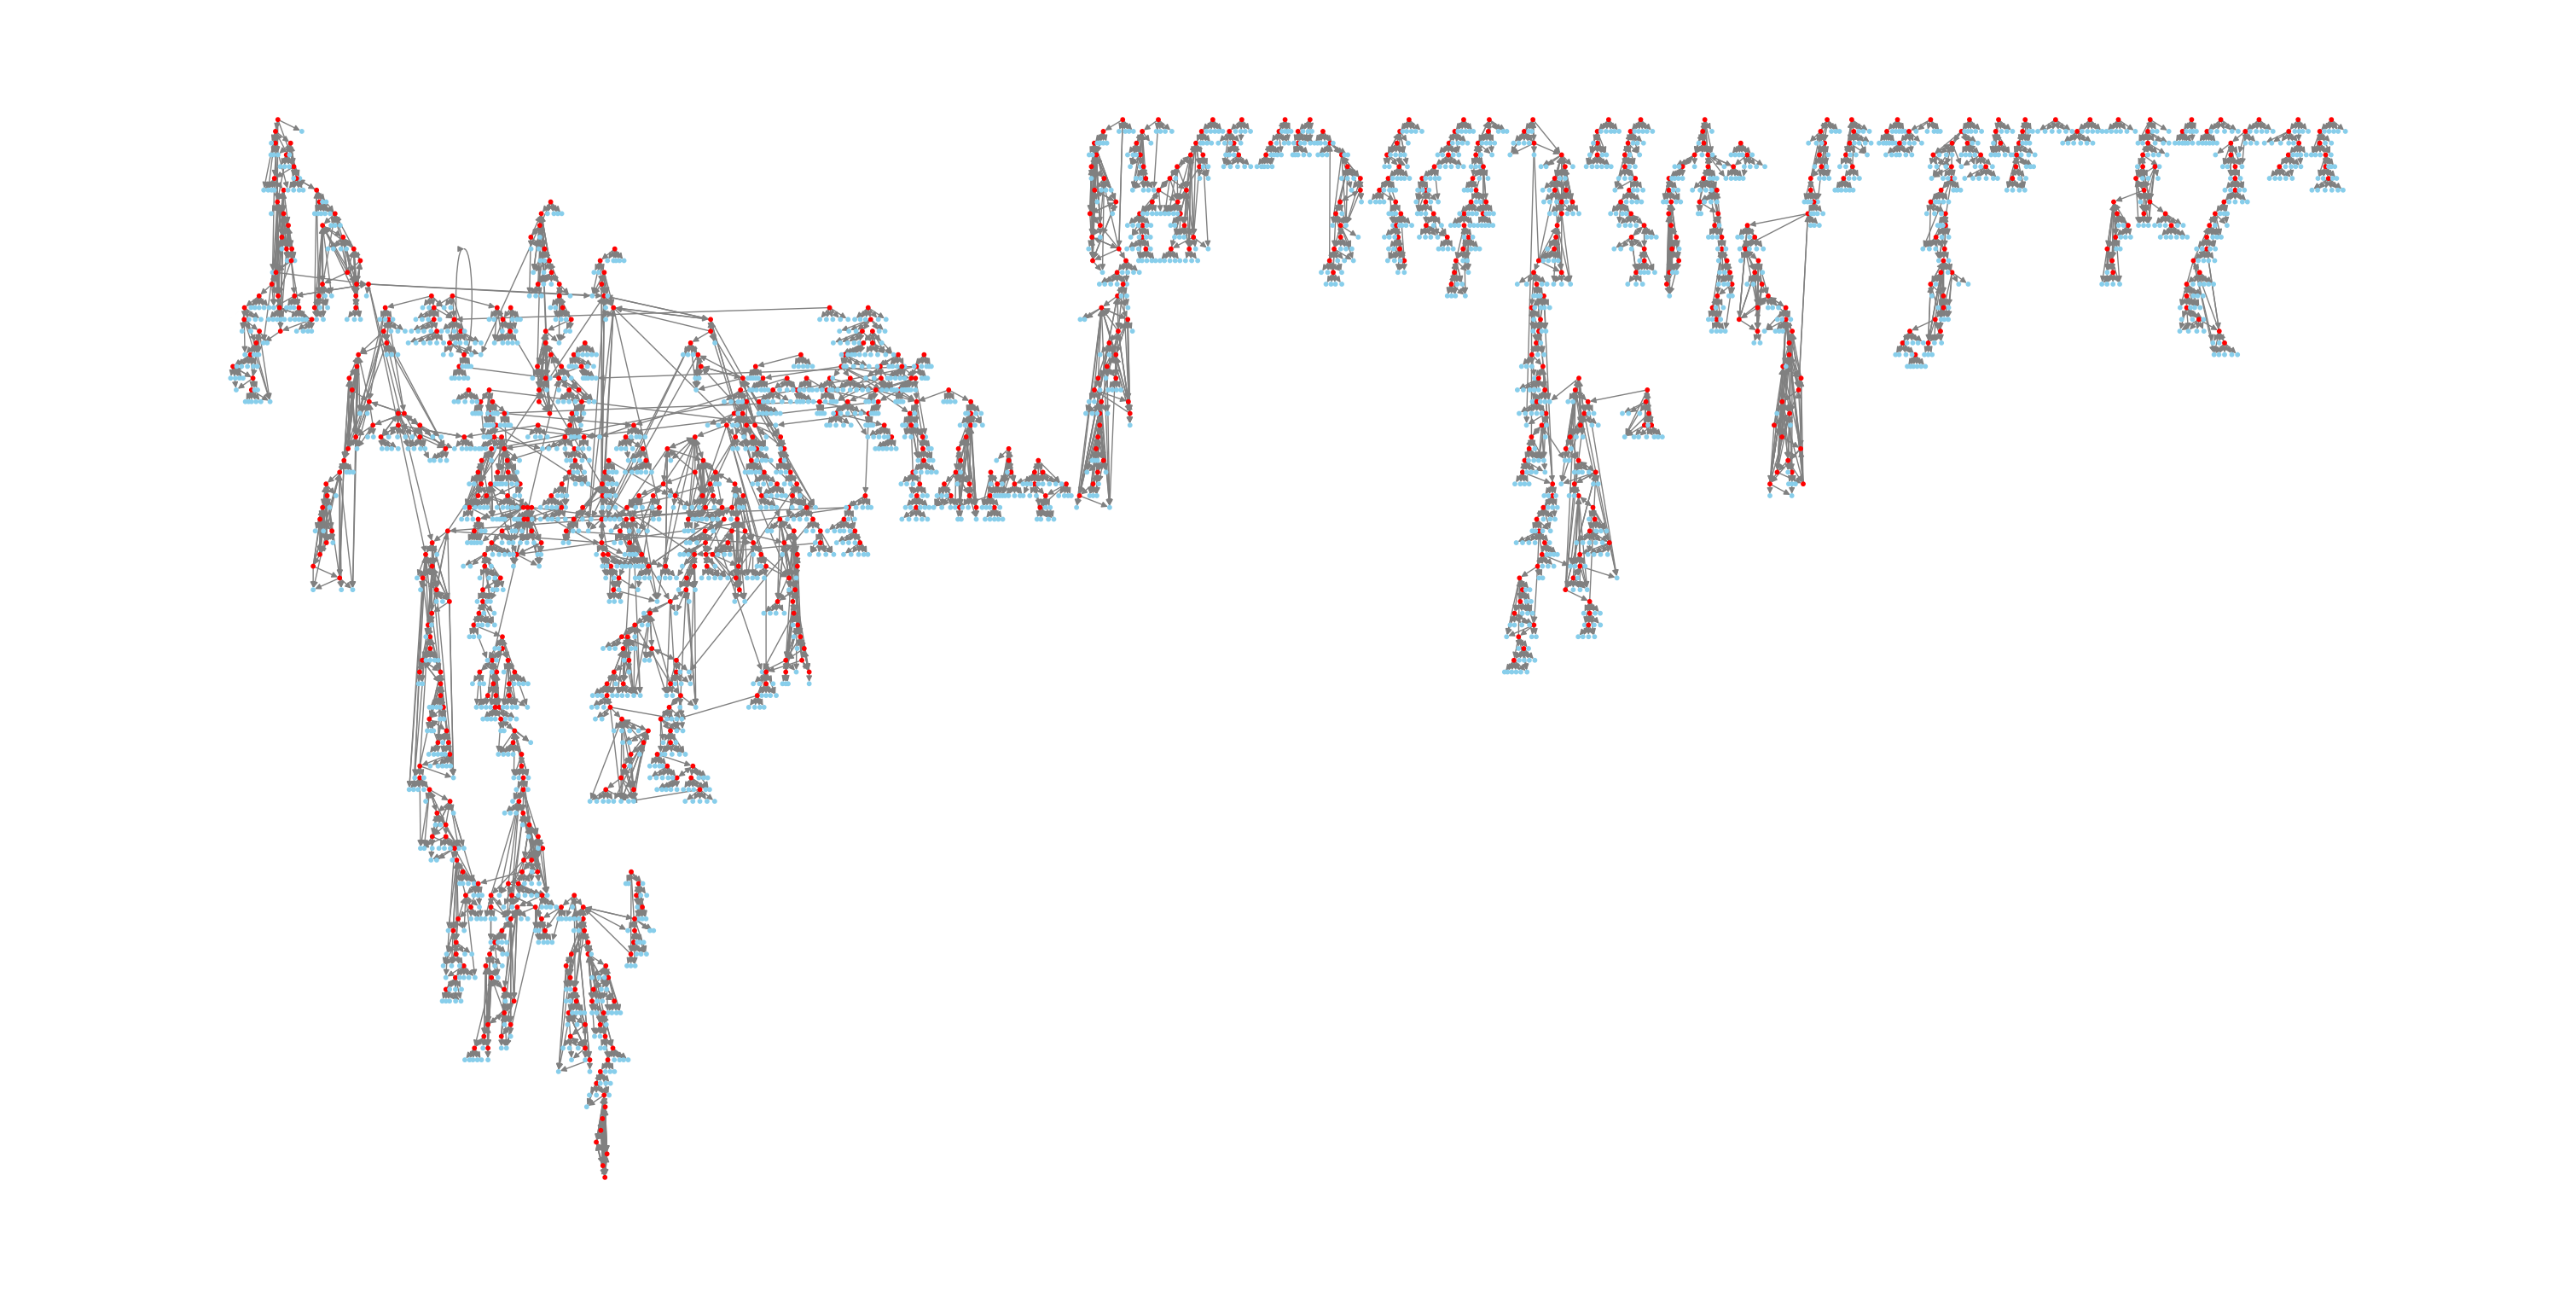

In [15]:
plt.figure(figsize=(30,15))
pos_normal = nx.nx_agraph.graphviz_layout(G, prog="dot")  # you can choose other layout algorithms
nx.draw(G,node_color=node_color_mapping,pos=pos_normal,with_labels=False,node_size=10, font_size=8, edge_color='gray')
plt.show()

### Pyvis Graphs

In [22]:
net = network.Network(notebook=True,directed=True,cdn_resources='in_line',bgcolor = "black",font_color = "white")
net.from_nx(G)

# # Set initial physics options
net.set_options("""
const options = {
  "physics": {
    "barnesHut": {
      "gravitationalConstant": -25000,
      "centralGravity": 0,
      "springLength": 150,
      "springConstant": 0.5,
      "avoidOverlap": 1,
      "damping":1
    },
    "minVelocity": 0.75
  }
}
""")

net.save_graph("wiki_graph.html")
HTML(filename="wiki_graph.html")

### Downloadable graph

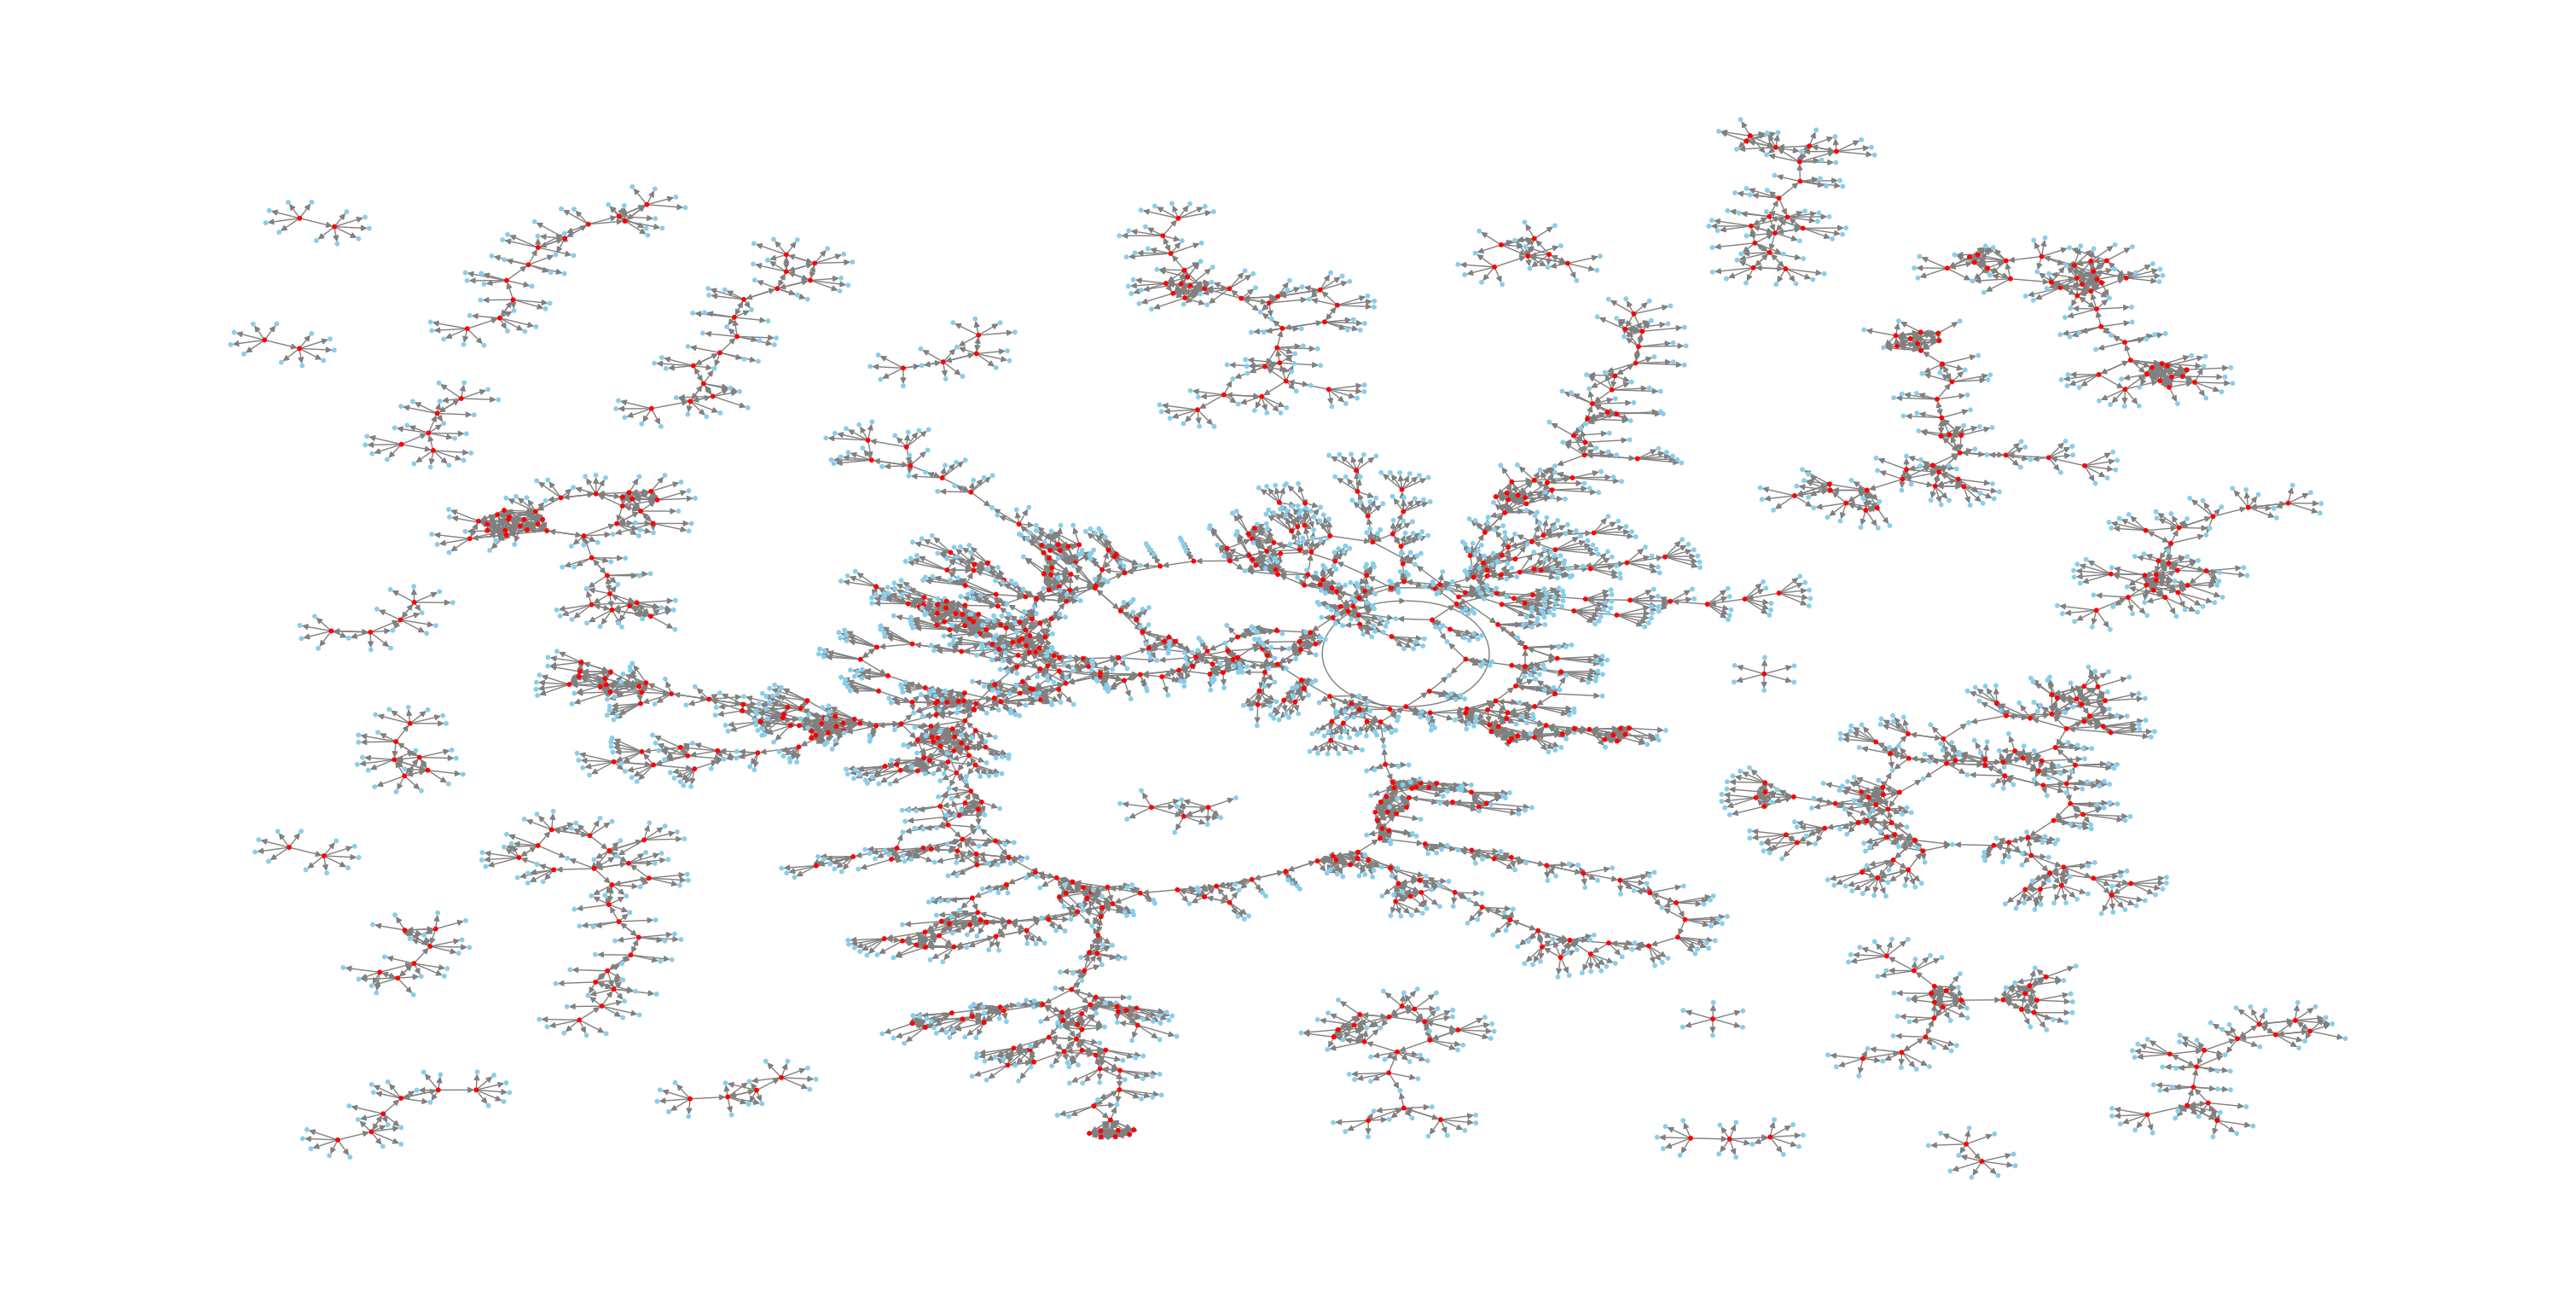

In [17]:
plt.figure(figsize=(30,15))
pos_normal = nx.nx_agraph.graphviz_layout(G, prog="neato")  # you can choose other layout algorithms
nx.draw(G,node_color=node_color_mapping,pos=pos_normal,with_labels=False,node_size=10, font_size=8, edge_color='gray')
plt.savefig('wiki_graph.pdf')

In [23]:
net = network.Network(directed=True,width="100%", height="1000px",bgcolor = "black",font_color = "white")
net.from_nx(G)
net.save_graph("down_wiki_graph.html")

## Graphs (Undirected Mode)

### Graphs

In [19]:
# # Create Plotly figure
# fig = go.Figure()

# # Add edges to the plot with the same color
# edge_color = 'rgba(0, 0, 0, 0.5)'
# for edge in G_undirected.edges():
#     fig.add_trace(go.Scatter(
#         x=[],
#         y=[],
#         mode='lines',
#         line=dict(width=2, color=edge_color),
#         hoverinfo='none',
#         line_shape='linear',  # Ensure line shape is set to 'linear'
#         line_smoothing=0  # Set line smoothing to 0
#     ))

# # Update edge positions using spring layout
# pos = nx.spring_layout(G_undirected)
# for i, edge in enumerate(G_undirected.edges()):
#     x0, y0 = pos[edge[0]]
#     x1, y1 = pos[edge[1]]
#     fig.data[i].x = [x0, x1, None]
#     fig.data[i].y = [y0, y1, None]

# # Add nodes to the plot with automatically assigned colors
# for i, node in enumerate(G_undirected.nodes()):
#     color = f'hsl({i / len(G_undirected.nodes()) * 360}, 50%, 50%)'  # Assign color based on node order
#     fig.add_trace(go.Scatter(
#         x=[],
#         y=[],
#         text=[node],
#         mode='markers',
#         marker=dict(size=20, color=color),
#         name=f'Node {node}'
#     ))

# # Update node positions using spring layout
# for i, (node, position) in enumerate(pos.items()):
#     fig.data[len(G_undirected.edges()) + i].x = [position[0]]
#     fig.data[len(G_undirected.edges()) + i].y = [position[1]]

# # Set layout options
# fig.update_layout(
#     showlegend=False,
#     hovermode='closest',
#     margin=dict(b=0, l=0, r=0, t=0),
#     xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
#     yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
# )

# # Show the plot
# fig.show()

In [20]:
# Compute layout positions using the spring layout algorithm
pos = nx.spring_layout(G_undirected)

# Plotly setup
fig = make_subplots(rows=1, cols=1)

edge_x = []
edge_y = []
for edge in G_undirected.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G_undirected.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))
node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G_undirected.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append('# of connections: ' + str(len(adjacencies[1])))

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

fig.add_trace(edge_trace)
fig.add_trace(node_trace)

# Set layout options
fig.update_layout(
    title='<b>Network graph made with Python for Wiki Connections</b>',
    titlefont_size=16,
    showlegend=False,
    hovermode='closest',
    margin=dict(b=20, l=20, r=20, t=30),
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    title_x=0.01,  # Adjust the x-coordinate for title
    title_y=0.975   # Adjust the y-coordinate for title
)

fig.show()

# Misc

In [21]:
!curl ipecho.net/plain

34.80.206.195